In [ ]:
# Import Libraries

In [1]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [9]:
import mysql

In [97]:
import mysql.connector

In [99]:
from mysql.connector import Error

In [ ]:
#Customer Table

In [15]:
path=r"C:\Users\anand\Downloads\Customers.csv"
df_customers=pd.read_csv(path,encoding='latin-1')
df_customers

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [17]:
df_customers['Birthday'] = pd.to_datetime(df_customers['Birthday'], format="%m/%d/%Y", errors='coerce').dt.date
df_customers

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


In [19]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [21]:
df_customers.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [23]:
df_customers.drop(["State Code","Zip Code"],axis=1,inplace=True)

Text(0.5, 1.0, 'counts as per Country')

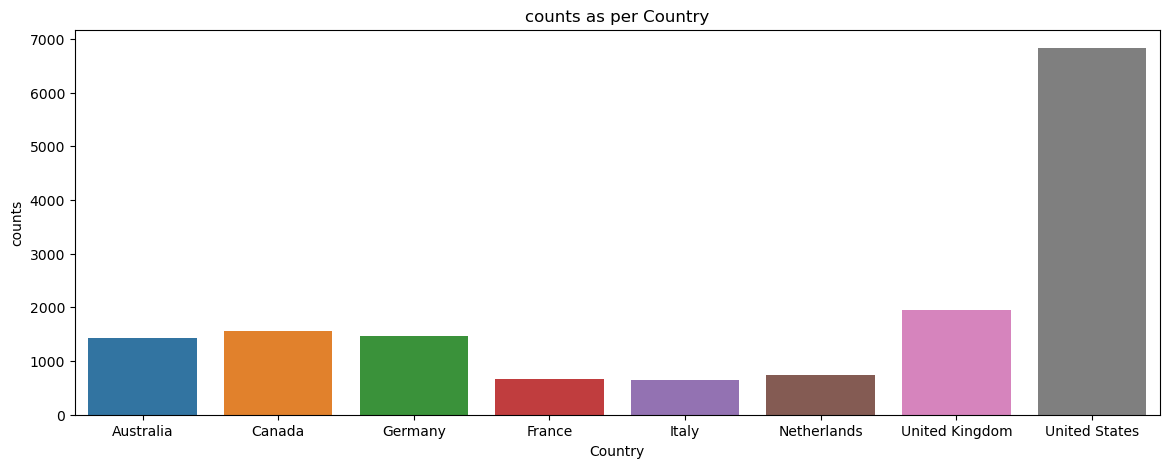

In [45]:
plt.figure(figsize=(14,5))
sns.countplot(x=df_customers["Country"],data=df_customers,hue="Country")
plt.xlabel("Country")
plt.ylabel("counts")
plt.title("counts as per Country")

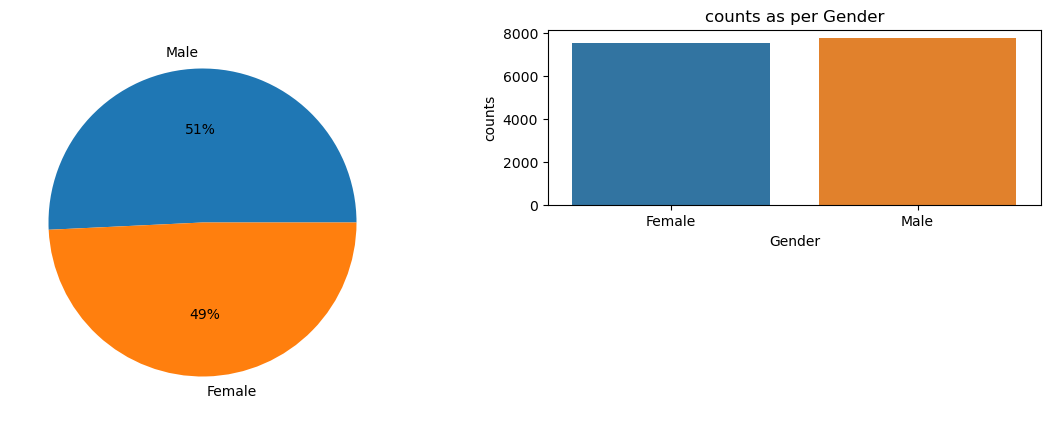

In [43]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.pie(df_customers["Gender"].value_counts(), 
        autopct='%1.0f%%', 
        labels=['Male', 'Female'])
plt.subplot(2,2,2)
sns.countplot(x=df_customers["Gender"],data=df_customers,hue="Gender")
plt.xlabel("Gender")
plt.ylabel("counts")
plt.title("counts as per Gender")
plt.show()

In [ ]:
#Exchange Table

In [29]:
path=r"C:\Users\anand\Downloads\Exchange_Rates.csv"
df_exchange=pd.read_csv(path)
df_exchange

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [31]:
df_exchange.rename(columns={"Currency":"Currency Code"},inplace=True)
df_exchange['Date'] = pd.to_datetime(df_exchange['Date'], format="%m/%d/%Y", errors='coerce')

In [33]:
df_exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           11215 non-null  datetime64[ns]
 1   Currency Code  11215 non-null  object        
 2   Exchange       11215 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 263.0+ KB


In [35]:
df_exchange.isnull().sum()

Date             0
Currency Code    0
Exchange         0
dtype: int64

Text(0.5, 1.0, 'counts as per Currency Code')

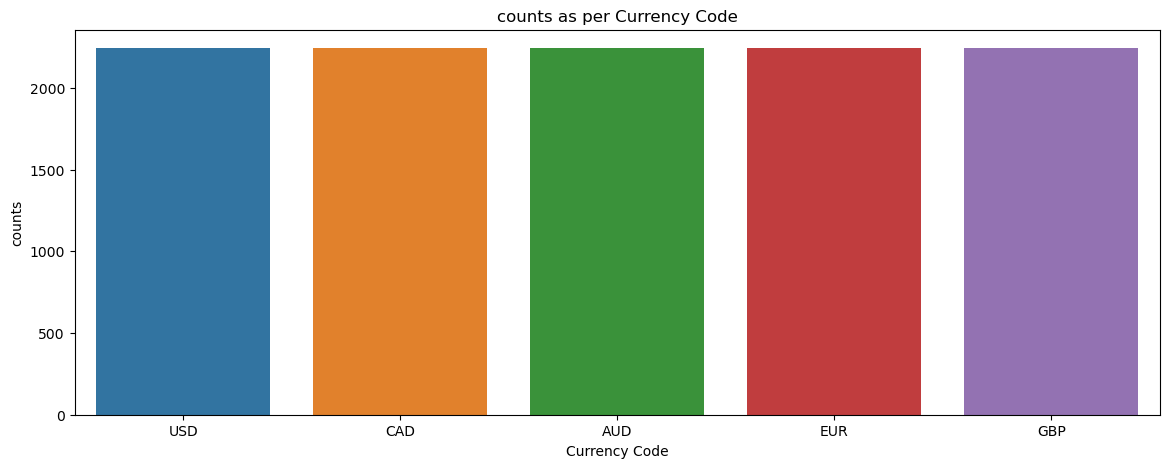

In [41]:
plt.figure(figsize=(14,5))
sns.countplot(x=df_exchange["Currency Code"],data=df_exchange,hue="Currency Code")
plt.xlabel("Currency Code")
plt.ylabel("counts")
plt.title("counts as per Currency Code")

In [ ]:
#Product Table

In [47]:
path=r"C:\Users\anand\Downloads\Products.csv"
df_products=pd.read_csv(path)
df_products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [49]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [51]:
df_products.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [53]:
df_products["Unit Cost USD"] = df_products["Unit Cost USD"].str.replace("$", "").str.replace(",", "")
df_products["Unit Cost USD"] = df_products["Unit Cost USD"].astype(float)

df_products["Unit Price USD"] = df_products["Unit Price USD"].str.replace("$", "").str.replace(",", "")
df_products["Unit Price USD"] = df_products["Unit Price USD"].astype(float)

In [55]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


In [57]:
df_products.drop(["SubcategoryKey"],axis=1,inplace=True)

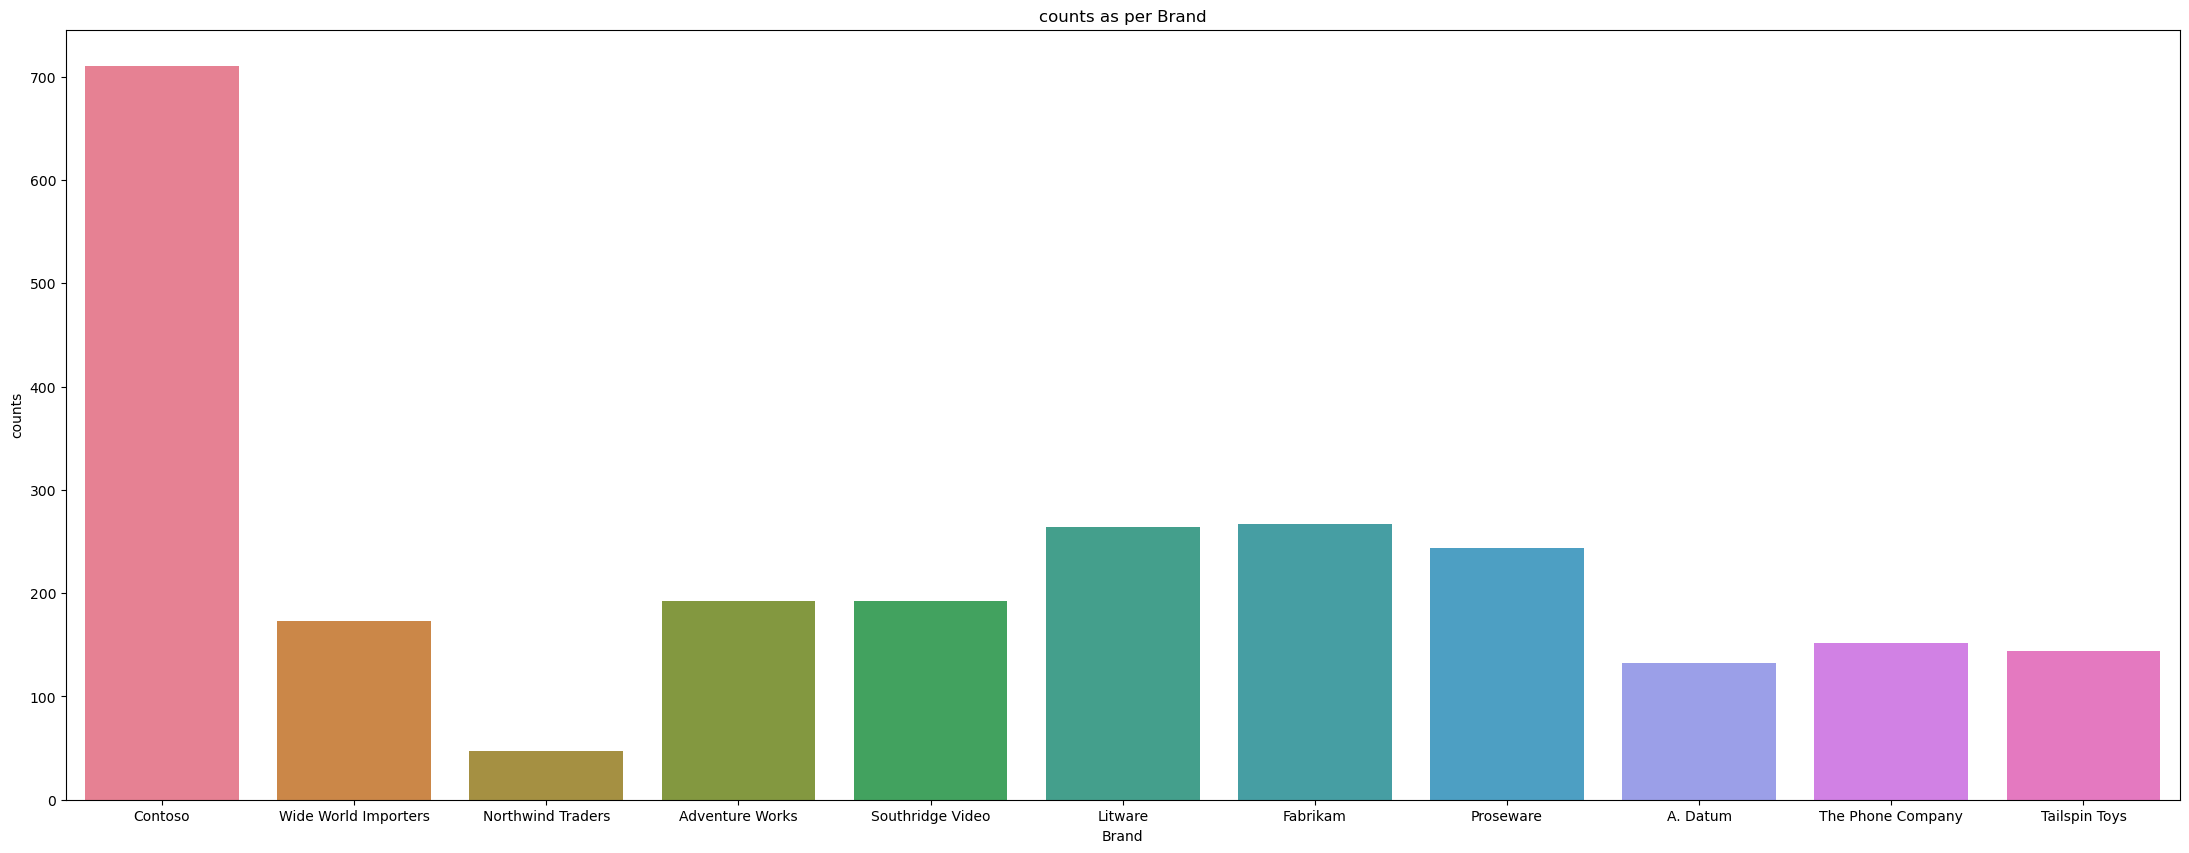

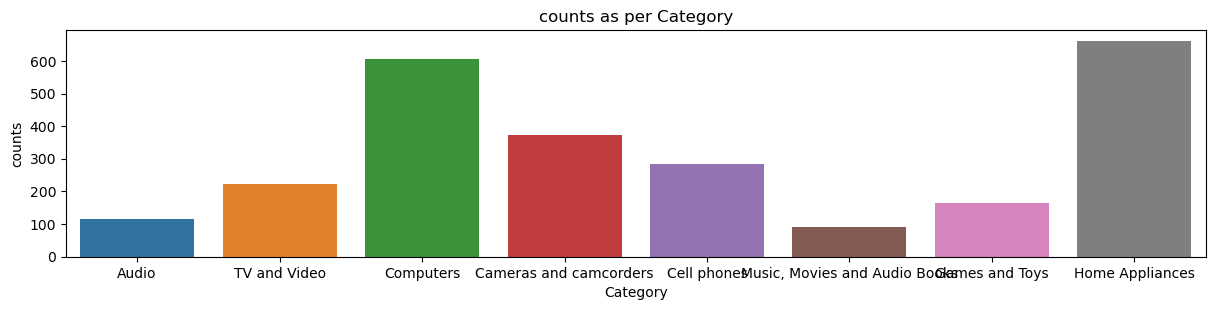

In [67]:
plt.figure(figsize=(60,10))
plt.subplot(1,2,1)
sns.countplot(x=df_products["Brand"],data=df_products,hue="Brand")
plt.xlabel("Brand")
plt.ylabel("counts")
plt.title("counts as per Brand")
plt.show()
plt.figure(figsize=(50,10))
plt.subplot(3,3,3)
sns.countplot(x=df_products["Category"],data=df_products,hue="Category")
plt.xlabel("Category")
plt.ylabel("counts")
plt.title("counts as per Category")
plt.show()

In [ ]:
#Sales Table

In [69]:
path=r"C:\Users\anand\Downloads\Sales.csv"
df_sales=pd.read_csv(path)
df_sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [71]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [75]:
df_sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [77]:
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], format="%m/%d/%Y", errors='coerce').dt.date

In [79]:
df_sales["Delivery Date"]=df_sales["Delivery Date"].fillna(0)

In [ ]:
#Store Table

In [81]:
path=r"C:\Users\anand\Downloads\Stores.csv"
df_stores=pd.read_csv(path)
df_stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [83]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [85]:
df_stores.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [87]:
df_stores.fillna(0)

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [89]:
df_stores['Open Date'] = pd.to_datetime(df_stores['Open Date'], format="%m/%d/%Y", errors='coerce').dt.date

In [91]:
df_stores = df_stores.replace({np.nan: None})

In [ ]:
#MySql Connector

In [113]:
try:
    mydb= mysql.connector.connect(
        host ="127.0.0.1",
        database='datasparkdbase',
        user="root",
        password="Vasandh@12",
        port="3306"
        
    )
    my_cursor=mydb.cursor()
    my_cursor.execute("SELECT SCHEMA_NAME FROM INFORMATION_SCHEMA.SCHEMATA WHERE SCHEMA_NAME = 'datasparkdbase'")
    exists = my_cursor.fetchone()
    if not exists:
        my_cursor.execute("CREATE DATABASE datasparkdbase")

except Error as e:
    print(f"Error: {e}")

In [115]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS customer_details(
                  CustomerKey INT,
                  Gender VARCHAR(255),
                  Name VARCHAR(255),
                  City VARCHAR(255),
                  State VARCHAR(255),
                  Country VARCHAR(255),
                  Continent VARCHAR(255),
                  Birthday VARCHAR(255)
                  )''')
print("Table Created successfully")

Table Created successfully


In [117]:
insert_query='''INSERT INTO customer_details(
                  CustomerKey,
                  Gender,
                  Name,
                  City,
                  State,
                  Country,
                  Continent,
                  Birthday)
                  VALUES(%s,%s,%s,%s,%s,%s,%s,%s)'''
data=df_customers.values.tolist()
my_cursor.executemany(insert_query,data)
print("Inserted successfully")

Inserted successfully


In [119]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS exchange_details(
                  Date VARCHAR(255),
                  Currency_Code VARCHAR(255),
                  Exchange FLOAT
                  )''')
print("Table Created successfully")

Table Created successfully


In [121]:
insert_query ='''INSERT INTO exchange_details(
                  Date,
                 Currency_Code,
                  Exchange)
                  VALUES (%s, %s, %s)'''
data=df_exchange.values.tolist()
my_cursor.executemany(insert_query,data)
print("Inserted successfully")

Inserted successfully


In [123]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS product_details(
                  ProductKey INT,
                  Product_Name VARCHAR(255),
                  Brand VARCHAR(255),
                  Color VARCHAR(255),
                  Unit_Cost_USD FLOAT,
                  Unit_Price_USD FLOAT,
                  Subcategory VARCHAR(255),
                  CategoryKey VARCHAR(255),
                  Category VARCHAR(255)
                  )''')
print("Table Created successfully")

Table Created successfully


In [125]:
insert_query ='''INSERT INTO product_details(
                  ProductKey,
                  Product_Name,
                  Brand,
                  Color,
                  Unit_Cost_USD,
                  Unit_Price_USD,
                  Subcategory,
                  CategoryKey,
                  Category)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s,%s)'''
data=df_products.values.tolist()
my_cursor.executemany(insert_query,data)
print("Inserted successfully")

Inserted successfully


In [127]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS sales_details(
                  Order_Number INT,
                  Line_Item INT,
                  Order_Date VARCHAR(255),
                  Delivery_Date VARCHAR(255),
                  CustomerKey INT,
                  StoreKey INT,
                  ProductKey INT,
                  Quantity INT,
                  Currency_Code VARCHAR(255)
                  )''')
print("Table Created successfully")

Table Created successfully


In [129]:
insert_query ='''INSERT INTO sales_details(
                  Order_Number,
                  Line_Item,
                  Order_Date,
                  Delivery_Date,
                  CustomerKey,
                  StoreKey,
                  ProductKey,
                  Quantity,
                  Currency_Code)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s,%s)'''
data=df_sales.values.tolist()
my_cursor.executemany(insert_query,data)
print("Inserted successfully")

Inserted successfully


In [131]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS stores_details(
                  StoreKey INT,
                  Country VARCHAR(255),
                  State VARCHAR(255),
                  Square_Meters FLOAT,
                  Open_Date VARCHAR(255)
                  )''')
print("Table Created successfully")

Table Created successfully


In [133]:
insert_query ='''INSERT INTO stores_details(
                 StoreKey,
                  Country,
                  State,
                  Square_Meters,
                  Open_Date)
                  VALUES (%s, %s, %s, %s, %s)'''
data=df_stores.values.tolist()
my_cursor.executemany(insert_query,data)
print("Inserted successfully")

Inserted successfully
